<a href="https://colab.research.google.com/github/bbash/-ArewaDS-Machine-Learning-Assignment/blob/main/Task_1_Pumpkin_Varieties_and_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pumpkin Varieties and Color
Load up required libraries and dataset.

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
pumpkins = pd.read_csv('US-pumpkins.csv')

In [ ]:
# first five instances
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [ ]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [ ]:
pumpkins.shape

(1757, 26)

In [ ]:
# row size
pumpkins.shape[0]

1757

In [ ]:
# column size
pumpkins.shape[1]

26

In [ ]:
# print the columns (headers) name
pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# summary of the data
pumpkins.describe()


,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#print the last five instances
pumpkins.tail()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


In [ ]:
#Duplicate Rows
pumpkins.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1752    False
1753    False
1754    False
1755    False
1756    False
Length: 1757, dtype: bool

In [ ]:
# Find duplicated rows
dup_rows = pumpkins[pumpkins.duplicated()]


# Count the number of duplicates
num_duplicates = len(dup_rows)
print("\nNumber of Duplicates:", num_duplicates)
# Display the duplicated rows in a tabular format
print("Duplicated Rows:")
dup_rows.head()



Number of Duplicates: 5
Duplicated Rows:


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
97,BALTIMORE,NaN,24 inch bins,BIG MACK TYPE,NaN,NaN,9/24/16,50.0,60.0,50.0,...,EACH,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
100,BALTIMORE,NaN,24 inch bins,BIG MACK TYPE,NaN,NaN,10/1/16,50.0,60.0,50.0,...,EACH,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
103,BALTIMORE,NaN,24 inch bins,BIG MACK TYPE,NaN,NaN,10/8/16,50.0,60.0,50.0,...,EACH,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
133,BALTIMORE,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,10/15/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
137,BALTIMORE,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,10/22/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [ ]:
# First, clean the data a bit, dropping null values and selecting only some of the columns:

In [ ]:
#1.Add the following code:

In [ ]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [ ]:
new_pumpkins

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0
...,...,...,...,...,...,...
1694,12,3,5,4,6,1
1695,12,3,5,4,6,1
1696,12,3,5,4,6,1
1697,12,3,5,4,6,1


In [ ]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int64
 1   Package    991 non-null    int64
 2   Variety    991 non-null    int64
 3   Origin     991 non-null    int64
 4   Item Size  991 non-null    int64
 5   Color      991 non-null    int64
dtypes: int64(6)
memory usage: 54.2 KB


In [ ]:
new_pumpkins.columns

Index(['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color'], dtype='object')

In [ ]:
new_pumpkins.shape

(991, 6)

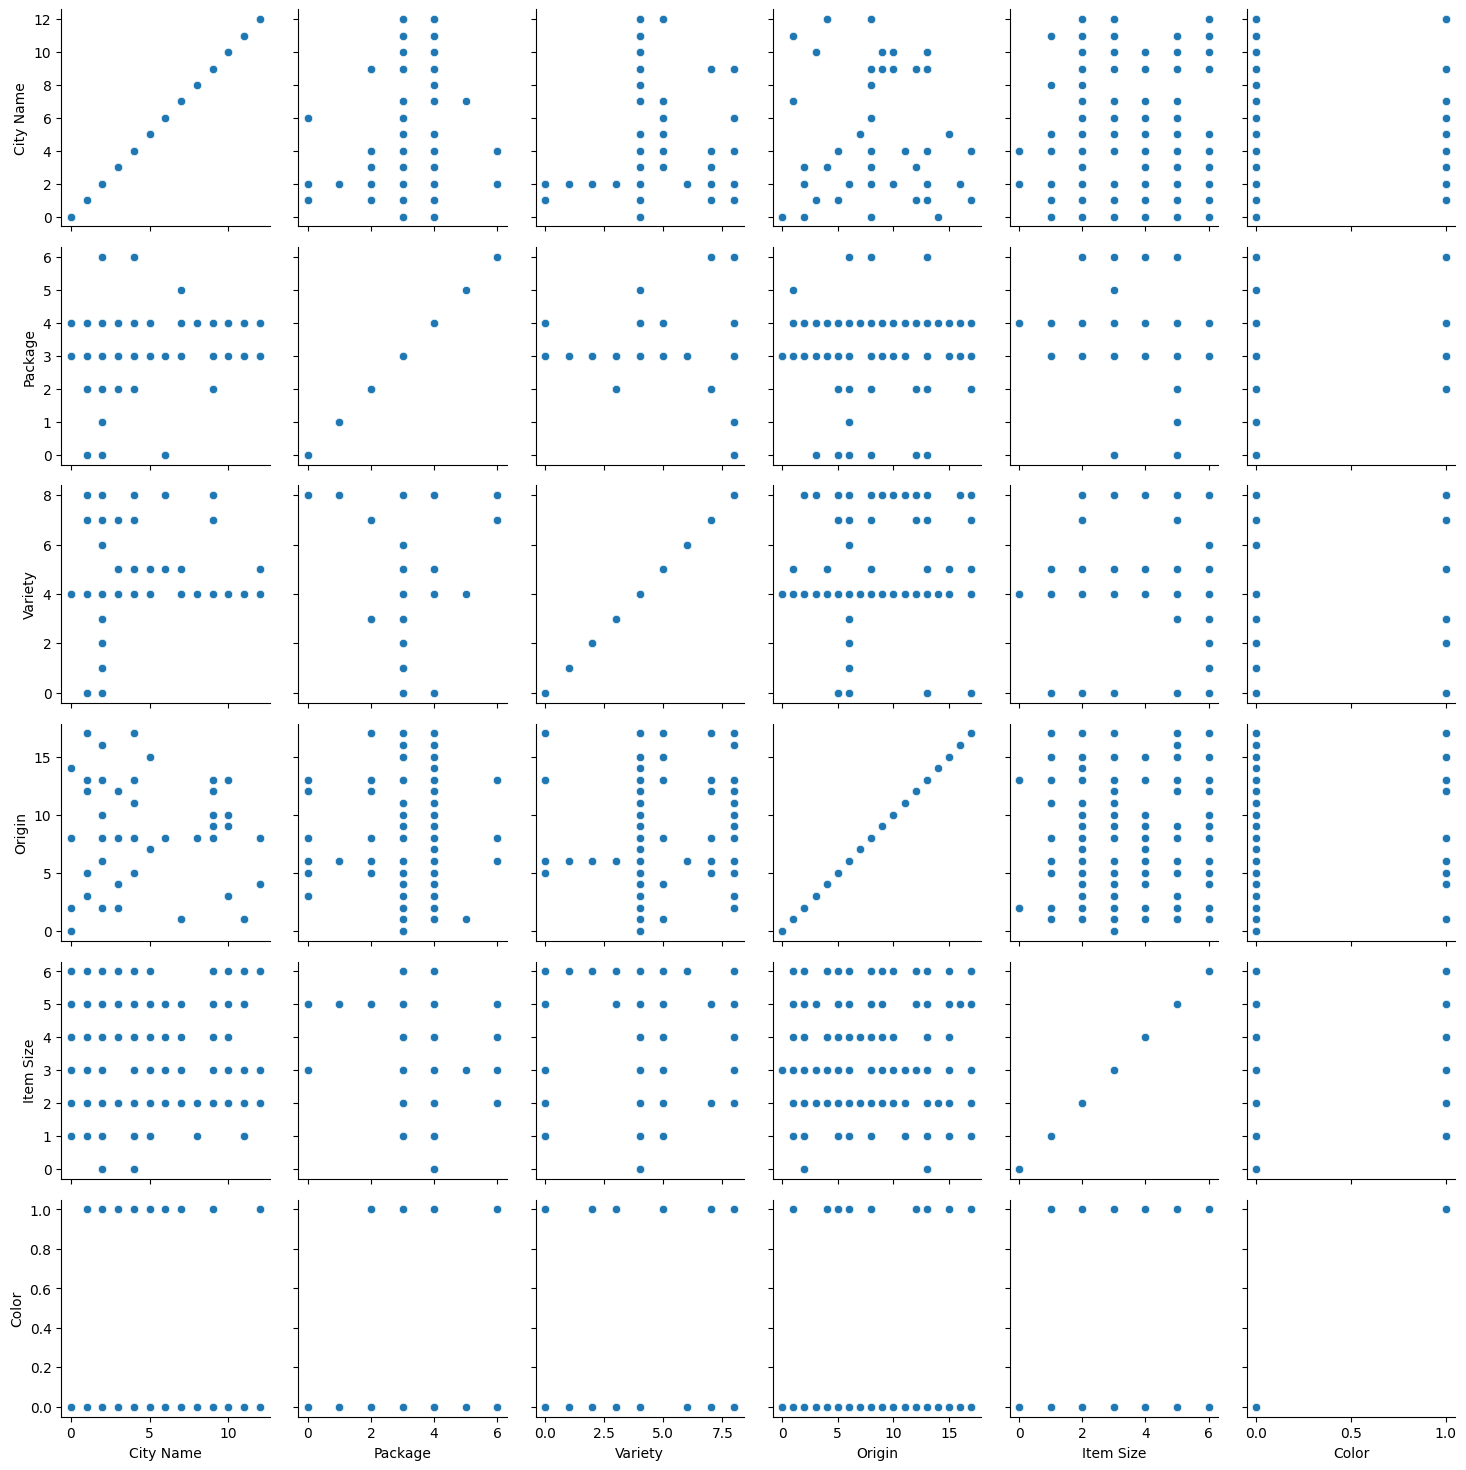

In [ ]:
graph = sns.PairGrid(new_pumpkins)
graph.map(sns.scatterplot)

In [ ]:
#Try a 'swarm' plot to show the distribution of values:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


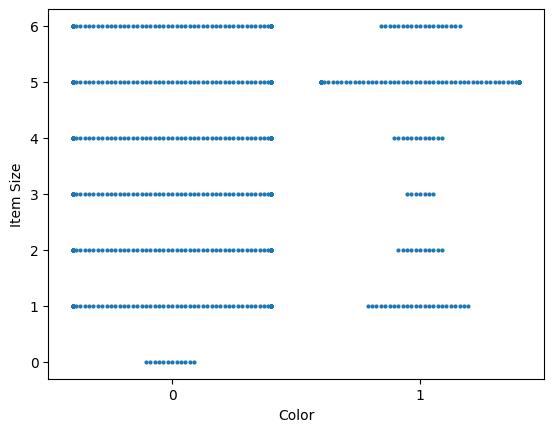

In [ ]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins,  size=3)
# Show the plot
plt.show()

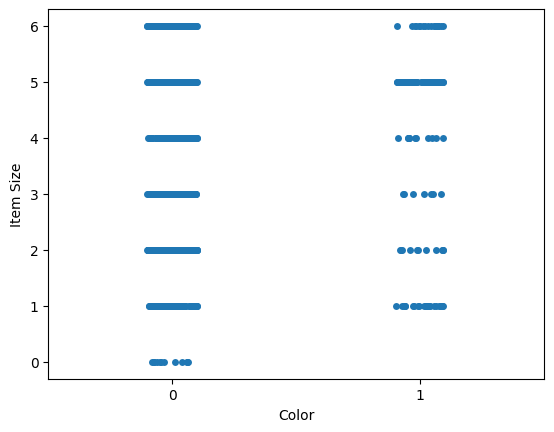

In [29]:
# Use a stripplot instead of swarmplot
sns.stripplot(x="Color", y="Item Size", data=new_pumpkins, jitter=True)

# Show the plot
plt.show()

In [ ]:
#As parameters x=Color, kind="violin" and call catplot():

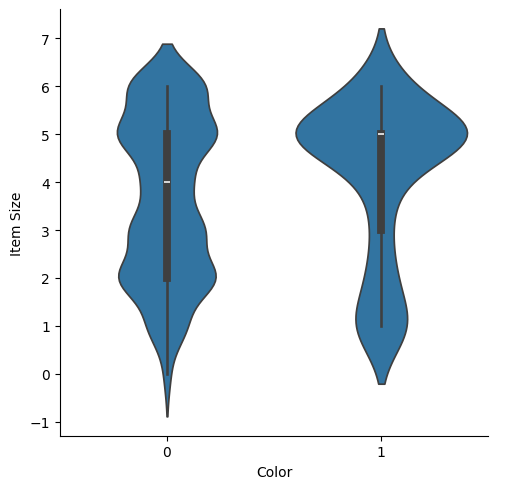

In [30]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [ ]:
# Try creating this plot, and other Seaborn plots, using other variables.

In [ ]:
#Example 1: Boxplot of 'Item Size' grouped by 'Package'

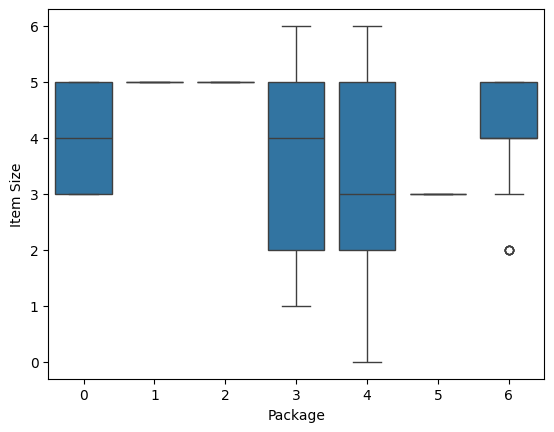

In [31]:
sns.boxplot(x='Package', y='Item Size', data=new_pumpkins)
plt.show()


In [ ]:
#Example 2: Violinplot of 'Item Size' grouped by 'Origin'

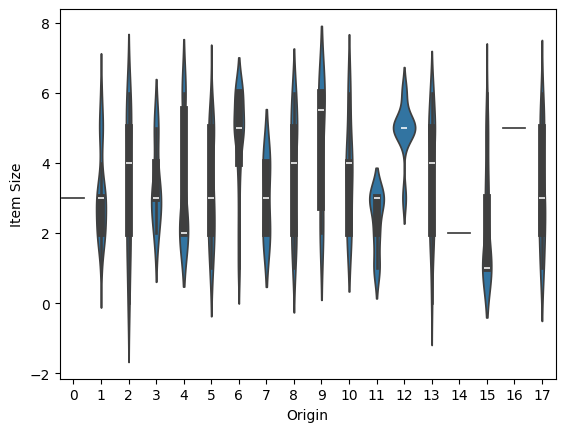

In [32]:
sns.violinplot(x='Origin', y='Item Size', data=new_pumpkins)
plt.show()


In [ ]:
#Example 3: Barplot of average 'Item Size' for each 'Variety'

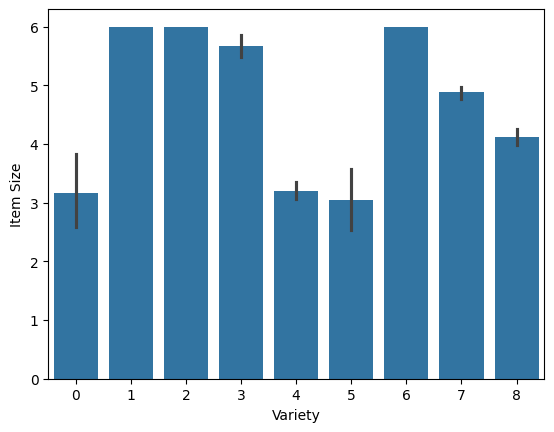

In [33]:
sns.barplot(x='Variety', y='Item Size', data=new_pumpkins)
plt.show()


In [ ]:
#Example 4: Countplot of 'Color'

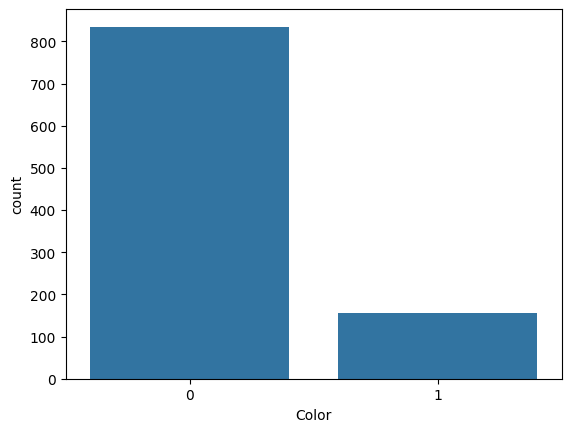

In [34]:
sns.countplot(x='Color', data=new_pumpkins)
plt.show()


In [ ]:
#Example 5: Scatterplot of 'Item Size' versus 'City Name'

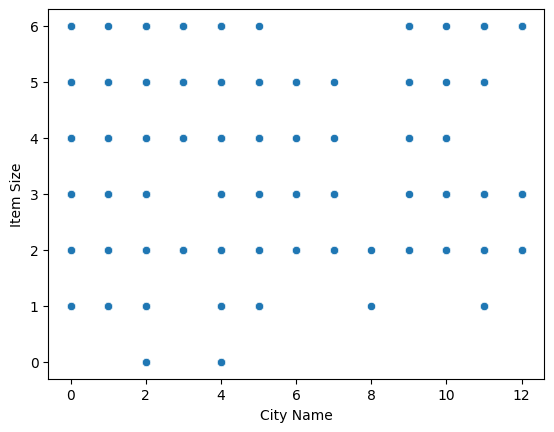

In [35]:
sns.scatterplot(x='City Name', y='Item Size', data=new_pumpkins)
plt.show()


# Model

In [ ]:
#1 Select the variables you want to use in your classification model and split the training and test sets calling train_test_split():

In [36]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


# Better comprehension via a confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

# Visualize the ROC curve of this model

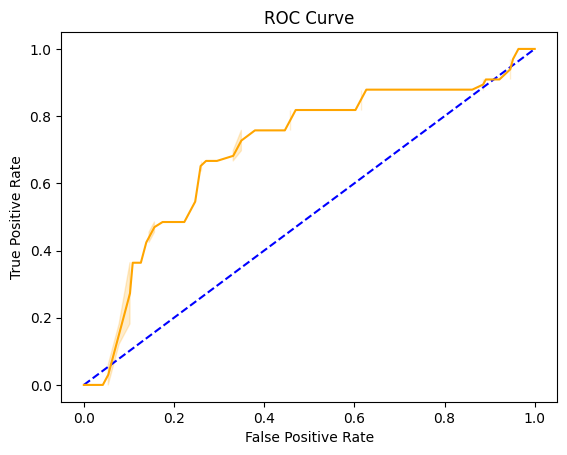

In [39]:
y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Plot the ROC curve
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='blue')  # Plot the diagonal line
sns.lineplot(x=fpr, y=tpr, color='orange')  # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [40]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748
